In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
matches = pd.read_csv("matches.csv",index_col=0)

In [3]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [43]:
matches['season'].unique()

array([2022, 2021])

In [44]:
matches.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team'],
      dtype='object')

In [4]:
matches.isnull().sum()

date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance       696
captain            0
formation          0
referee            0
match report       0
notes           1389
sh                 0
sot                0
dist               1
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [41]:
matches.describe()

,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,693.000000,0.0,1389.000000,1389.000000,1388.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,1.335493,1.380850,1.304176,1.338445,49.702664,36089.963925,NaN,12.153348,4.041037,17.011527,0.455724,0.119510,0.147588,2021.452844
std,1.274235,1.291049,0.767268,0.789360,12.401897,17797.991778,NaN,5.268876,2.403866,2.988364,0.665389,0.352187,0.387804,0.497951
min,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,NaN,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2021.000000
25%,0.000000,0.000000,0.700000,0.700000,40.000000,24351.000000,NaN,8.000000,2.000000,15.100000,0.000000,0.000000,0.000000,2021.000000
50%,1.000000,1.000000,1.200000,1.200000,50.000000,32061.000000,NaN,12.000000,4.000000,16.900000,0.000000,0.000000,0.000000,2021.000000
75%,2.000000,2.000000,1.800000,1.800000,59.000000,52214.000000,NaN,15.000000,5.000000,18.800000,1.000000,0.000000,0.000000,2022.000000
max,9.000000,9.000000,4.600000,5.000000,82.000000,73458.000000,NaN,31.000000,15.000000,34.900000,4.000000,3.000000,3.000000,2022.000000


In [7]:
matches['team'].value_counts()

Southampton                 72
Brighton and Hove Albion    72
Manchester United           72
West Ham United             72
Newcastle United            72
Burnley                     71
Leeds United                71
Crystal Palace              71
Manchester City             71
Wolverhampton Wanderers     71
Tottenham Hotspur           71
Arsenal                     71
Leicester City              70
Chelsea                     70
Aston Villa                 70
Everton                     70
Liverpool                   38
Fulham                      38
West Bromwich Albion        38
Sheffield United            38
Brentford                   34
Watford                     33
Norwich City                33
Name: team, dtype: int64

In [4]:
# Create a new match to convert D, W, L to 0, 1, 2
new_match = matches.replace(['L','D','W'],[0,1,2])

In [47]:
new_match.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,0,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,2,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,2,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,2,1.0,0.0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,1,0.0,0.0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [65]:
high_pos= new_match[new_match['poss']>75]
high_pos

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,2,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
18,2021-11-21,14:00,Premier League,Matchweek 12,Sun,Home,2,3.0,0.0,Everton,...,Match Report,NaN,17.0,7.0,15.4,1.0,0.0,0.0,2022,Manchester City
22,2021-12-04,17:30,Premier League,Matchweek 15,Sat,Away,2,3.0,1.0,Watford,...,Match Report,NaN,26.0,12.0,14.0,0.0,0.0,0.0,2022,Manchester City
28,2021-12-29,20:15,Premier League,Matchweek 20,Wed,Away,2,1.0,0.0,Brentford,...,Match Report,NaN,12.0,4.0,18.7,0.0,0.0,0.0,2022,Manchester City
15,2021-10-30,15:00,Premier League,Matchweek 10,Sat,Away,2,3.0,0.0,Newcastle Utd,...,Match Report,NaN,18.0,5.0,19.8,1.0,1.0,1.0,2022,Chelsea
25,2021-12-16,19:45,Premier League,Matchweek 17,Thu,Home,1,1.0,1.0,Everton,...,Match Report,NaN,23.0,10.0,14.8,2.0,0.0,0.0,2022,Chelsea
19,2020-12-15,20:00,Premier League,Matchweek 13,Tue,Home,1,1.0,1.0,West Brom,...,Match Report,NaN,26.0,7.0,16.6,2.0,0.0,0.0,2021,Manchester City
30,2021-01-26,20:15,Premier League,Matchweek 20,Tue,Away,2,5.0,0.0,West Brom,...,Match Report,NaN,18.0,7.0,17.0,0.0,0.0,0.0,2021,Manchester City
57,2021-05-14,20:00,Premier League,Matchweek 36,Fri,Away,2,4.0,3.0,Newcastle Utd,...,Match Report,NaN,15.0,6.0,19.0,1.0,0.0,0.0,2021,Manchester City
23,2020-12-27,16:30,Premier League,Matchweek 15,Sun,Home,1,1.0,1.0,West Brom,...,Match Report,NaN,17.0,2.0,17.8,2.0,0.0,0.0,2021,Liverpool


In [66]:
high_pos['result'].value_counts(normalize=True)

2    0.666667
1    0.333333
Name: result, dtype: float64

In [62]:
high_pos['result'].value_counts()

2    8
1    4
Name: result, dtype: int64

In [10]:
new_match.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team'],
      dtype='object')

## XG Analysis

In [7]:
#Sort in order
new_match.groupby('team')['xg'].sum().sort_values(ascending=False)

team
Manchester City             148.1
Chelsea                     120.0
Manchester United           111.2
Tottenham Hotspur           108.2
Arsenal                     105.6
Leeds United                 99.4
West Ham United              98.9
Leicester City               98.1
Aston Villa                  89.2
Brighton and Hove Albion     88.5
Southampton                  86.1
Everton                      82.5
Newcastle United             76.5
Crystal Palace               73.1
Liverpool                    73.0
Burnley                      71.4
Wolverhampton Wanderers      70.5
Brentford                    41.2
Fulham                       41.1
Watford                      34.7
West Bromwich Albion         33.8
Sheffield United             31.5
Norwich City                 28.9
Name: xg, dtype: float64

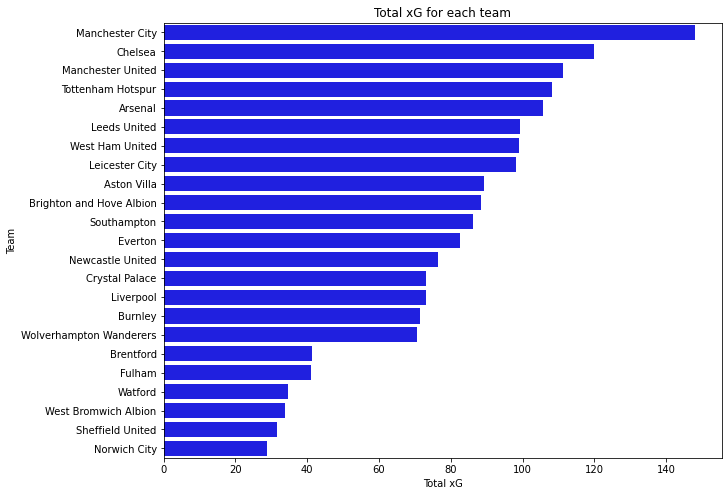

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# calculate the total xG for each team
xg_totals = new_match.groupby('team')['xg'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))

# create horizontal bar chart
sns.barplot(x=xg_totals, y=xg_totals.index, color='blue')

# set plot title and axis labels
plt.title('Total xG for each team')
plt.xlabel('Total xG')
plt.ylabel('Team')

plt.show()




In [40]:
#average xg per team
new_match.groupby("team")["xg"].mean().sort_values(ascending=False)

team
Manchester City             2.085915
Liverpool                   1.921053
Chelsea                     1.714286
Manchester United           1.544444
Tottenham Hotspur           1.523944
Arsenal                     1.487324
Leicester City              1.401429
Leeds United                1.400000
West Ham United             1.373611
Aston Villa                 1.274286
Brighton and Hove Albion    1.229167
Brentford                   1.211765
Southampton                 1.195833
Everton                     1.178571
Fulham                      1.081579
Newcastle United            1.062500
Watford                     1.051515
Crystal Palace              1.029577
Burnley                     1.005634
Wolverhampton Wanderers     0.992958
West Bromwich Albion        0.889474
Norwich City                0.875758
Sheffield United            0.828947
Name: xg, dtype: float64

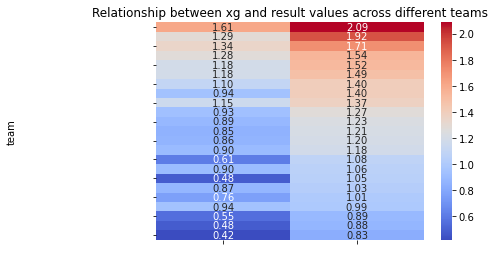

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a pivot table with xg and result values for each team
pivot_table = new_match.pivot_table(values=['xg', 'result'], index='team', aggfunc='mean').sort_values(by='xg', ascending=False)

# create heatmap
heatmap = sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f')

# set x and y axis label colors to white
heatmap.set_xticklabels(heatmap.get_xticklabels(), color='white')
heatmap.set_yticklabels(heatmap.get_yticklabels(), color='white')

plt.title('Relationship between xg and result values across different teams')
plt.show()



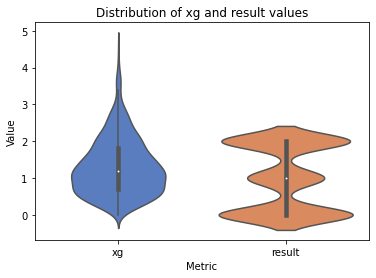

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a violin plot of xg and result distributions
sns.violinplot(data=new_match[['xg', 'result']], palette='muted')

# set plot title and axis labels
plt.title('Distribution of xg and result values')
plt.xlabel('Metric')
plt.ylabel('Value')

plt.show()



In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Prepare the data
X = new_match[['xg']]
y = new_match['result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5251798561151079


In [45]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load data
data = pd.read_csv('matches.csv')

# Create new feature for xg_diff (difference between xg and xga)
data['xg_diff'] = data['xg'] - data['xga']

# Create target variable (1 if team won, 0 if team lost or drew)
data['target'] = data['result'].apply(lambda x: 1 if 'W' in x else 0)

# Select features for model
features = ['xg_diff', 'poss']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data['target'], test_size=0.2, random_state=42)

# Create logistic regression model
lr = LogisticRegression()

# Fit model to training data
lr.fit(X_train, y_train)

# Predict on test data
y_pred = lr.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.85      0.80       171
           1       0.71      0.56      0.62       107

    accuracy                           0.74       278
   macro avg       0.73      0.71      0.71       278
weighted avg       0.74      0.74      0.73       278



Precision: Out of all the instances that the model predicted as positive, how many were actually positive? In this case, the precision for class 0 is 0.76 and for class 1 is 0.71. This means that when the model predicts a team will win (class 1), it is correct 71% of the time, and when it predicts a team will lose (class 0), it is correct 76% of the time.
Recall: Out of all the positive instances, how many did the model correctly predict as positive? In this case, the recall for class 0 is 0.85 and for class 1 is 0.56. This means that the model is better at identifying the negative class (when a team loses), with a recall of 0.85, but is not as good at identifying the positive class (when a team wins), with a recall of 0.56.
F1-score: The harmonic mean of precision and recall. It provides a balanced measure of precision and recall. In this case, the F1-score for class 0 is 0.80 and for class 1 is 0.62.
Support: The number of instances of each class in the dataset.
The overall accuracy of the model is 0.74, which means it correctly classified 74% of the instances. The macro average of precision, recall, and F1-score is 0.73, 0.71, and 0.71, respectively. The weighted average takes into account the number of instances of each class and is 0.74 for precision, recall, and F1-score.


Based on the recall scores, the model may be biased towards the negative class (when a team loses). The precision scores are relatively high, which means that when the model makes a prediction, it is often correct. However, the model may miss some instances of the positive class, which may be important in certain applications. It is also possible that the model could be improved by tuning the hyperparameters or using a different algorithm.

## Manchester United  Win Analysis

In [12]:
ManUnited=matches[matches['team']=='Manchester United']
ManUnited.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2021-08-14,12:30,Premier League,Matchweek 1,Sat,Home,W,5.0,1.0,Leeds United,...,Match Report,NaN,16.0,8.0,18.0,0.0,0.0,0.0,2022,Manchester United
1,2021-08-22,14:00,Premier League,Matchweek 2,Sun,Away,D,1.0,1.0,Southampton,...,Match Report,NaN,15.0,3.0,13.9,1.0,0.0,0.0,2022,Manchester United
2,2021-08-29,16:30,Premier League,Matchweek 3,Sun,Away,W,1.0,0.0,Wolves,...,Match Report,NaN,10.0,3.0,18.3,1.0,0.0,0.0,2022,Manchester United
3,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,1.0,Newcastle Utd,...,Match Report,NaN,21.0,6.0,20.3,0.0,0.0,0.0,2022,Manchester United
5,2021-09-19,14:00,Premier League,Matchweek 5,Sun,Away,W,2.0,1.0,West Ham,...,Match Report,NaN,17.0,10.0,16.4,0.0,0.0,0.0,2022,Manchester United


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Prepare the data
X = ManUnited[['poss']]
y = ['result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6


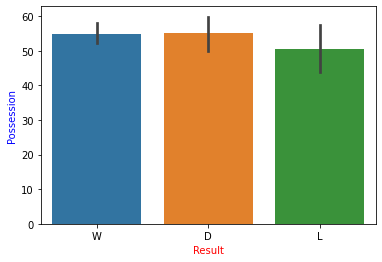

<Figure size 720x720 with 0 Axes>

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt



# Create a bar plot with seaborn
ax = sns.barplot(x='result', y='poss', data=ManUnited)

# Set the x and y axis labels and change the color
ax.set_xlabel("Result", color='red')
ax.set_ylabel("Possession", color='blue')

# Set the figure size
plt.figure(figsize=(10, 10))



# Show the plot
plt.show()


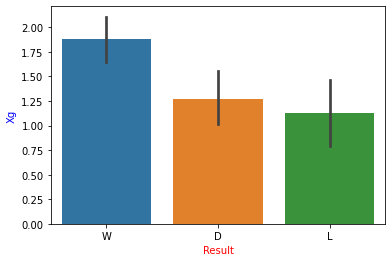

<Figure size 720x720 with 0 Axes>

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt



# Create a bar plot with seaborn
ax = sns.barplot(x='result', y='xg', data=ManUnited)

# Set the x and y axis labels and change the color
ax.set_xlabel("Result", color='red')
ax.set_ylabel("Xg", color='blue')

# Set the figure size
plt.figure(figsize=(10, 10))



# Show the plot
plt.show()